# Week 3: Omitted variable bias and Environmental Justice
The **objective** of this lecture is to examine how omitted variables impacts the linear regression.

estimated slope: 3088.023153852626
estimated intercept: 9397.714674580966


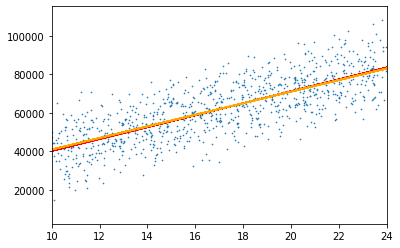

In [196]:
import pandas
import numpy

# N is the number of people in the sample
N = 1000

# m is the linear slope between education and income 
# (it is the additional annual income for each year of education)
m = 3000

# b is the linear intercept
# (it is the annual income for someone with 0 years of education)
b = 11000

dgp_df = pandas.DataFrame(
    data = {
        "random_error": numpy.random.normal(0, 10000, N),
        "data_science_interest": numpy.random.uniform(-1, 1, N) # can't observe this
    }
)


dgp_df["education"] = dgp_df["data_science_interest"] + numpy.random.uniform(10, 24, N)
dgp_df["total_error"] = dgp_df["data_science_interest"]*100 + dgp_df["random_error"]

dgp_df["income"] = m * dgp_df["education"] + b + dgp_df["total_error"]

dgp_df.describe()


# import matplotlib.pyplot as plt

# plt.scatter(
#     dgp_df["education"],
#     dgp_df["income"],
#     s=0.4
# )

dgp_df["income_avg"] = m * dgp_df["education"] + b

# plt.plot(
#     dgp_df["education"],
#     dgp_df["income_avg"],
#     color="orange"
# )

from scipy import stats

m_estimated, b_estimated, r, p, stderr = stats.linregress(dgp_df["education"], dgp_df["income"])

print(f"estimated slope: {m_estimated}")
print(f"estimated intercept: {b_estimated}")

plt.xlim([10, 24])

plt.scatter(
    dgp_df["education"],
    dgp_df["income"],
    s=0.4
)

plt.plot(
    dgp_df["education"],
    m_estimated * dgp_df["education"] + b_estimated,
    color="red"
)

plt.plot(
    dgp_df["education"],
    dgp_df["income_avg"],
    color="orange"
)